In [1]:
import pandas as pd

df = pd.read_csv('student_stats.csv')

print(df.head())


    Name  Study_Hours  Marks  Sleep_Hours  Phone_Hours  TV_Hours
0   Amit            1     40            9            5         2
1  Priya            2     50            8            4         3
2   Ravi            3     60            7            3         4
3  Sneha            4     70            6            2         5
4  Karan            5     80            5            1         6


In [2]:
import pandas as pd
import numpy as np

data = {
    'Study_Hours': [2, 3, 5, 6, 7, 8, 10, 4, 1, 9],
    'Marks': [55, 60, 75, 80, 85, 90, 95, 70, 50, 92],
    'Sleep_Hours': [7, 8, 6, 7, 8, 7, 6, 9, 8, 7]
}
df = pd.DataFrame(data)

correlation_table = df.corr()

print("Correlation Table:")
print(correlation_table)

Correlation Table:
             Study_Hours     Marks  Sleep_Hours
Study_Hours     1.000000  0.988810    -0.483549
Marks           0.988810  1.000000    -0.442676
Sleep_Hours    -0.483549 -0.442676     1.000000


In [3]:
import pandas as pd
import io

data = """Marks,Hours_Studied,Attendance,Assignments_Completed,Extracurriculars
85,10,95,5,2
90,12,98,6,1
60,3,80,2,4
75,8,90,4,3
95,15,100,7,1
50,2,70,1,5"""

df = pd.read_csv(io.StringIO(data))

correlations = df.corr()['Marks']

positive_correlations = correlations[correlations > 0].index.tolist()

print("Columns with a positive correlation with 'Marks':")
for col in positive_correlations:
    print(f"- {col}")

Columns with a positive correlation with 'Marks':
- Marks
- Hours_Studied
- Attendance
- Assignments_Completed


In [4]:
import pandas as pd
import numpy as np


np.random.seed(0)  # for reproducibility
data = {
    'Hours_Studied': np.random.uniform(1, 10, 100),
    'Attendance_Rate': np.random.uniform(50, 100, 100),
    'Marks': np.random.uniform(50, 100, 100),
    'Hours_Played_Games': np.random.uniform(1, 10, 100),
    'Sleep_Hours': np.random.uniform(4, 9, 100)
}
df = pd.DataFrame(data)

df['Hours_Played_Games'] = 120 - df['Marks'] + np.random.normal(0, 5, 100)

print("Sample DataFrame head:")
print(df.head())

Sample DataFrame head:
   Hours_Studied  Attendance_Rate      Marks  Hours_Played_Games  Sleep_Hours
0       5.939322        83.890827  65.589794           49.482652     6.006298
1       7.436704        63.500399  84.817174           27.823651     8.646457
2       6.424870        86.759701  68.887592           59.353083     4.498075
3       5.903949        98.109427  58.980184           61.840955     8.726508
4       4.812893        62.437657  51.233936           71.602515     8.347443


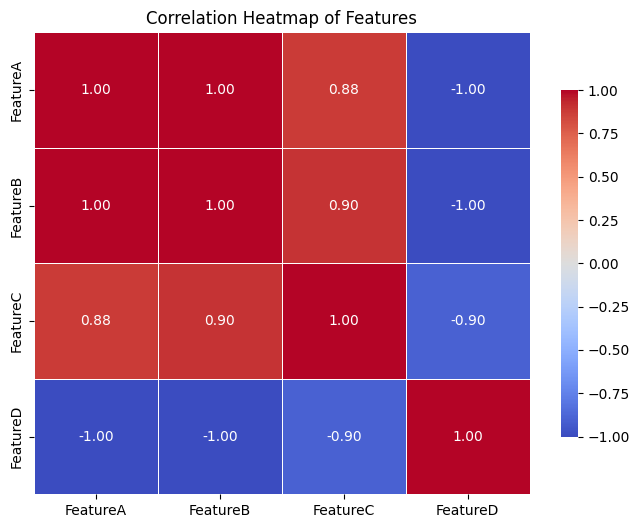

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = {
        'FeatureA': [10, 12, 15, 18, 20],
        'FeatureB': [5, 6, 7, 8, 9],
        'FeatureC': [2, 4, 3, 5, 6],
        'FeatureD': [8, 7, 6, 5, 4]
 }
df = pd.DataFrame(data)


correlation_matrix = df.corr()
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm', # Or 'RdBu', 'viridis', etc.
    fmt=".2f",
    linewidths=.5,
    vmin=-1,
    vmax=1,
    cbar_kws={'shrink': 0.75} # Adjust colorbar size
)
plt.title('Correlation Heatmap of Features')
plt.show()

In [7]:
import pandas as pd
import numpy as np

data = {
    'A': [10, 20, 30, 40, 50],
    'B': [12, 22, 33, 41, 52], # Strong positive correlation with A
    'C': [100, 80, 60, 40, 20], # Strong negative correlation with A
    'D': [5, 15, 25, 35, 45], # Moderate positive correlation
    'E': [1, 2, 3, 4, 5], # Weak positive correlation
}
df = pd.DataFrame(data)


corr_matrix = df.corr()
abs_corr_matrix = corr_matrix.abs()

strong_correlations = abs_corr_matrix.unstack().sort_values(ascending=False)

strong_correlations = strong_correlations[strong_correlations > 0.8]

strong_correlations = strong_correlations[strong_correlations.index.get_level_values(0) != strong_correlations.index.get_level_values(1)]

strong_correlations = strong_correlations.drop_duplicates()

print("Strong correlations (absolute value > 0.8):")
print(strong_correlations)

Strong correlations (absolute value > 0.8):
A  C    1.000000
B  D    0.999032
dtype: float64


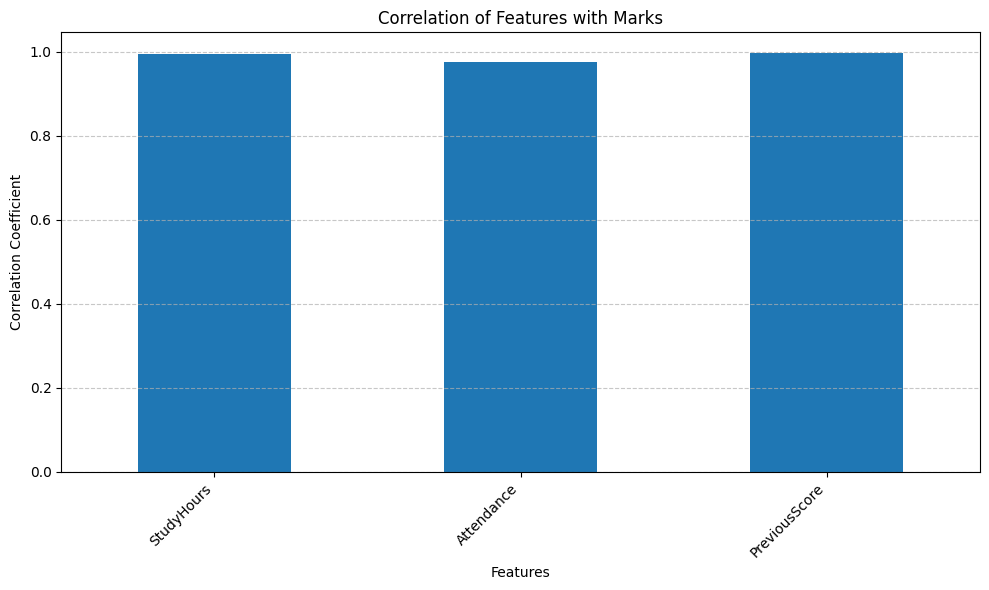

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'StudyHours': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Attendance': [80, 85, 90, 92, 95, 96, 98, 99, 100],
    'PreviousScore': [60, 65, 70, 75, 80, 85, 90, 95, 98],
    'Marks': [50, 55, 65, 70, 75, 80, 88, 92, 95]
}
df = pd.DataFrame(data)

correlations_with_marks = df.corr()['Marks']

correlations_with_marks = correlations_with_marks.drop('Marks')

plt.figure(figsize=(10, 6)) # Adjust figure size as needed
correlations_with_marks.plot(kind='bar')
plt.title('Correlation of Features with Marks')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a grid for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [10]:
import pandas as pd
from scipy.stats import pearsonr

data = {
    'phone_usage_hours': [5.5, 6.2, 4.8, 7.1, 3.9],
    'academic_marks_gpa': [3.0, 2.5, 3.5, 2.0, 3.8]
}
df = pd.DataFrame(data)

correlation, p_value = pearsonr(df['phone_usage_hours'], df['academic_marks_gpa'])

print(f"Pearson Correlation Coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.2f}")

if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

if correlation < 0:
    print("This indicates a negative correlation: higher phone usage is associated with lower marks.")
elif correlation > 0:
    print("This indicates a positive correlation: higher phone usage is associated with higher marks.")
else:
    print("This indicates no correlation.")

Pearson Correlation Coefficient: -0.99
P-value: 0.00
The correlation is statistically significant.
This indicates a negative correlation: higher phone usage is associated with lower marks.
